# 5.1 야후 파이낸스와 네이버 금융 비교하기

## 5.1.1 야후 파이낸스 데이터의 문제점

야후 파이낸스 주식 데이터가 사용하기에 편리하지만, 

문제점: 한국 주식 종목들의 데이터는 종가 및 수정 종가가 정확하지 않다. 

그리고 2017년 10월에 3주 가량 데이터가 비어있다.

=> 네이버 금융 주식 데이터를 스크레이핑하여 DB구축 한 뒤, 시세 API를 만들어보자!

[*********************100%***********************]  1 of 1 completed


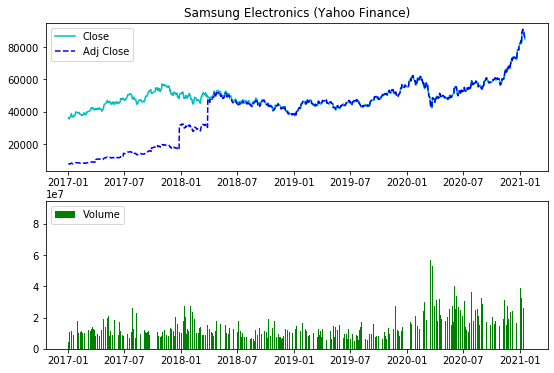

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

df = pdr.get_data_yahoo('005930.KS', '2017-01-01')

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)  # 2행 1열에서 첫 번째 영역 선택
plt.title('Samsung Electronics (Yahoo Finance)')
plt.plot(df.index, df['Close'], 'c', label='Close')  # 삼전 종가를 청록색 실선으로 표시
plt.plot(df.index, df['Adj Close'], 'b--', label='Adj Close')  # 삼전 수정 종가를 파란색 점선으로 표시
plt.legend(loc='best')
plt.subplot(2, 1, 2)  # 2행 1열 영역에서 두 번째 영역을 선택
plt.bar(df.index, df['Volume'], color='g', label='Volume')  # 바 차트로 그리기
plt.legend(loc='best')
plt.show()


## 5.1.2 네이버 금융 데이터로 시세 데이터베이스 구축하기

In [6]:
import matplotlib.pyplot as plt
from Investar import Analyzer  # ①

mk = Analyzer.MarketDB()  # ②
df = mk.get_daily_price('005930', '2017-07-10', '2018-06-30')  # ③

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.title('Samsung Electronics (Investar Data)')
plt.plot(df.index, df['close'], 'c', label='Close')  # ④
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.bar(df.index, df['volume'], color='g', label='Volume')
plt.legend(loc='best')
plt.show()

ModuleNotFoundError: No module named 'Investar'

# 5.2 마리아디비 설치 후 접속 확인

In [8]:
import pymysql

connection = pymysql.connect(host = 'localhost', port = 3306, db='INVESTAR',\
    user='root', passwd='0709', autocommit = True)

cursor = connection.cursor()
cursor.execute('SELECT VERSION();')
result = cursor.fetchone()

print('MariaDB version: {}'.format(result))

MariaDB version: ('10.5.8-MariaDB',)


# 5.3 주식 시세를 매일 DB로 업데이트하기
## 5.3.4 파이마이에스큐엘로 테이블 생성하기
## 5.3.5 종목코드 구하기

In [9]:
import pandas as pd 
class DBUpdater:
    def read_krx_code(self):
        # KRX로부터 상장기업 목록 파일을 읽어와서 DF로 변환
        url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
            'download&searchType=13'
        krx = pd.read_html(url, header = 0)[0]
        krx = krx[['종목코드','회사명']] # [[]]을 사용하면 특정 칼럼만 뽑아서 원하는 순서대로 재구성 가능
        krx = krx.rename(columns={'종목코드':'code','회사명':'company'})
        krx.code = krx.code.map('{:06d}'.format)
        return krx

## 5.3.6 종목코드를 DB에 업데이트하기

In [ ]:
import pandas as pd